<a href="https://colab.research.google.com/github/sergejhorvat/TinyML-Edx/blob/main/Applications%20of%20TinyML/Image_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing fashion mnist dataset
We will be working on the dataset in an unsupervised way, i.e., will ignore the labels and work on training examples only.

In [1]:
from keras.datasets import fashion_mnist

## Importing all the libraries

In [2]:
import keras
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input
#from keras.initializers import VarianceScaling
#from keras.engine.topology import Layer, InputSpec

#from sklearn.metrics import accuracy_score, normalized_mutual_info_score

### Downloading the Image data and reading it in numpy format

In [3]:
(train_X, train_Y), (val_X, val_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Preprocessing of data for feeding it into the network - 

In [4]:
# converting all the pixel values from range(0 to 255) to range(0,1)
train_X = train_X/255.
val_X = val_X/255.

#converting the Image data into values of pixels, i.e. - image of dimension 28 X 28 to single row of 784 pixels(28x28 = 784).
print("Dimension of training data before reshaping",train_X.shape)
train_X = train_X.reshape(-1, 784)
val_X = val_X.reshape(-1, 784)
print("Dimension of training data after reshaping",train_X.shape)

Dimension of training data before reshaping (60000, 28, 28)
Dimension of training data after reshaping (60000, 784)


# Defining Autoencoder Model

In [5]:
#!pip install -q tensorflow==1.0.0-beta1
#defining input placeholder for autoencoder model
input_img = Input(shape=(784,))

# "enc_rep" is the encoded representation of the input
enc_rep = Dense(2000, activation='relu')(input_img)
enc_rep = Dense(500, activation='relu')(enc_rep)
enc_rep = Dense(500, activation='relu')(enc_rep)
enc_rep = Dense(10, activation='sigmoid')(enc_rep)

# "decoded" is the lossy reconstruction of the input from encoded representation
decoded = Dense(500, activation='relu')(enc_rep)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Structure of our autoencoder model -

In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 2000)              1570000   
                                                                 
 dense_1 (Dense)             (None, 500)               1000500   
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
 dense_4 (Dense)             (None, 500)               5500      
                                                                 
 dense_5 (Dense)             (None, 500)               250500

## Compiling our model 

In [7]:
autoencoder.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## To enable early stropping in our model...
monitoring the validation loss and patience = 10 means for 10 continuous epochs, if validation loss will not be improved then it will stop there.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


## to train autoencoder on training data and validate on validation data

In [9]:
t_h = autoencoder.fit(train_X, train_X, epochs=500, batch_size=2048, validation_data=(val_X, val_X), callbacks=[early_stopper])

Epoch 1/500
30/30 [==============================] - 5s 36ms/step - loss: 0.0902 - val_loss: 0.0673
Epoch 2/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0572 - val_loss: 0.0456
Epoch 3/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0418 - val_loss: 0.0378
Epoch 4/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0372 - val_loss: 0.0353
Epoch 5/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0333 - val_loss: 0.0310
Epoch 6/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0291 - val_loss: 0.0274
Epoch 7/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0259 - val_loss: 0.0249
Epoch 8/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0245 - val_loss: 0.0237
Epoch 9/500
30/30 [==============================] - 1s 24ms/step - loss: 0.0231 - val_loss: 0.0227
Epoch 10/500
30/30 [==============================] - 1s 25ms/step - loss: 0.0220 - val_loss: 0.0221

## To predict images...

In [10]:
# to predict the reconstructed images for the original images...
pred = autoencoder.predict(val_X)

# To compare the original and reconstructed images....

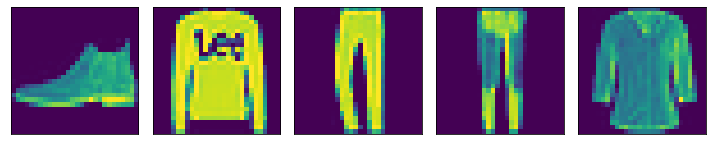

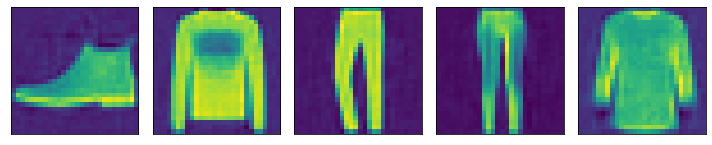

In [11]:
import matplotlib.pyplot as plt
# to visualize original images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(val_X[i].reshape(28, 28)) #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualize reconstructed images(output of autoencoder)
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28)) #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()